# Rank features of a Smartphone

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the train dataset  
train=pd.read_csv('MobileTrain.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# Creating a duplicate copy of the train dataset
train_df=train.copy()

In [4]:
# Loading the test dataset
test=pd.read_csv('MobileTest.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
# Creating a duplicate copy of the train dataset
test_df=test.copy()

In [6]:
# Analysis of train data set
train.shape

(2000, 21)

In [7]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [10]:
train.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [12]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
# Analysis of test data set
test.shape

(1000, 21)

In [14]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [16]:
test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [17]:
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [18]:
test.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [19]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [20]:
# Copying the 'id' of test data to test_id
test_id=[]
test_id=test['id']

In [21]:
test=test.drop('id',axis=1)

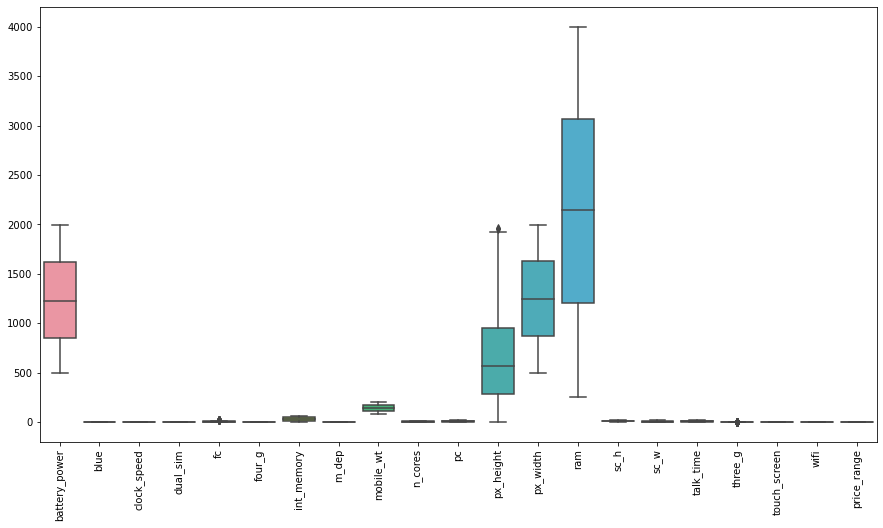

In [22]:
# Outliers
# Boxplot of the entire dataset
plt.figure(figsize=(15,8))
sns.boxplot(data=train)
plt.xticks(rotation = 90);

# * Univariate Analysis

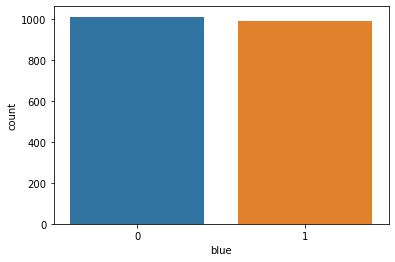

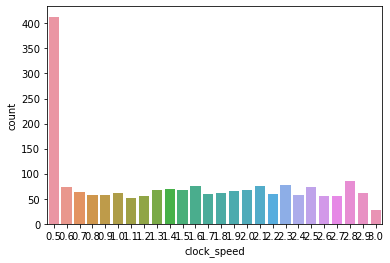

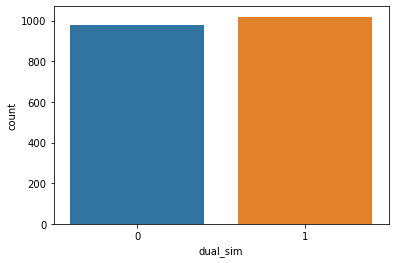

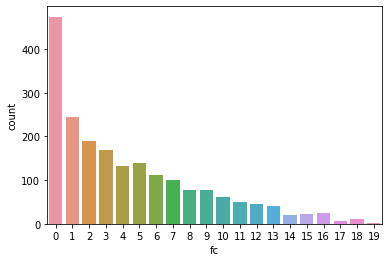

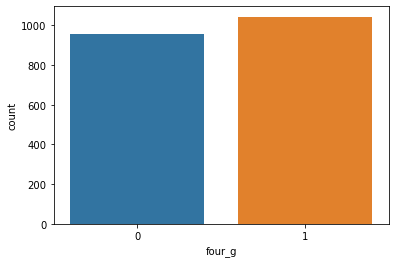

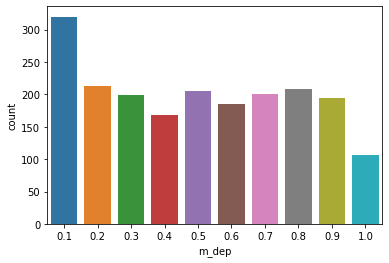

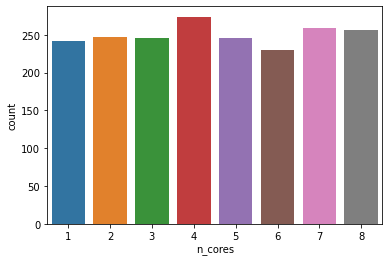

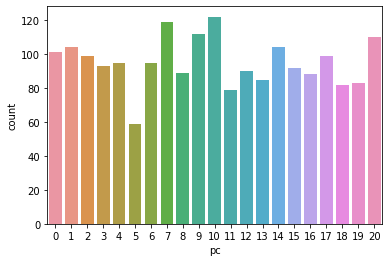

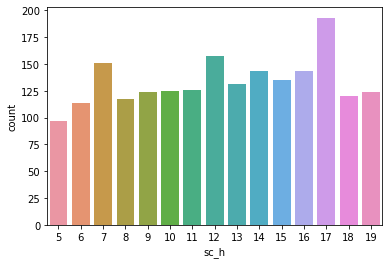

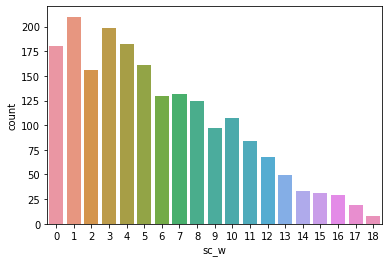

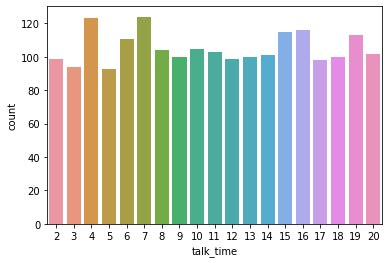

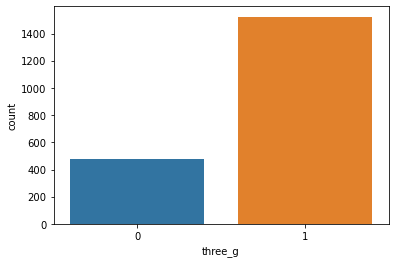

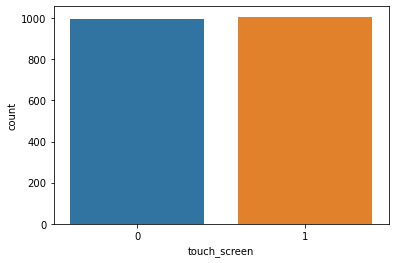

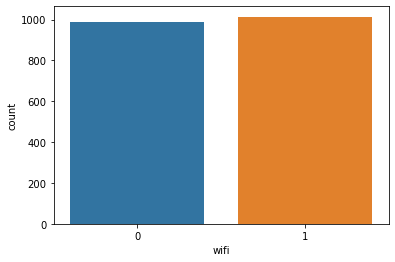

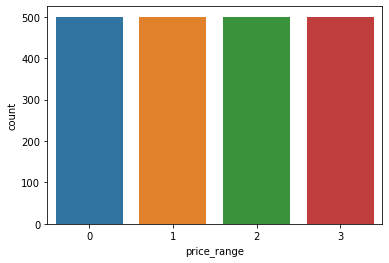

In [23]:
# Countplot of various columns
for i in train:
    if (train[i].nunique()<30):
        sns.countplot(x=train[i])
        plt.show()

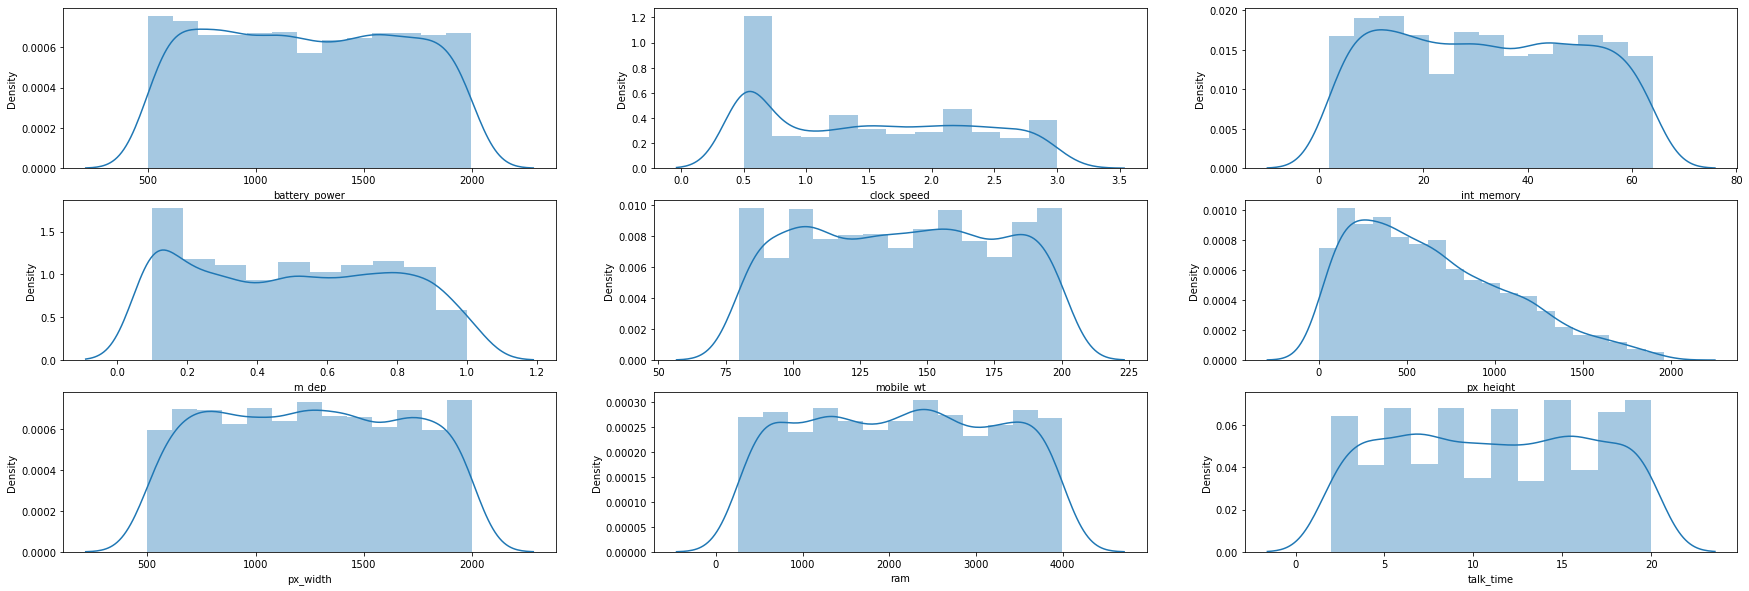

In [24]:
# Distplot of various columns
plt.figure(figsize=(30,10))
plt.subplot(331)
sns.distplot(train['battery_power'])
plt.subplot(332)
sns.distplot(train['clock_speed'])
plt.subplot(333)
sns.distplot(train['int_memory'])
plt.subplot(334)
sns.distplot(train['m_dep'])
plt.subplot(335)
sns.distplot(train['mobile_wt'])
plt.subplot(336)
sns.distplot(train['px_height'])
plt.subplot(337)
sns.distplot(train['px_width'])
plt.subplot(338)
sns.distplot(train['ram'])
plt.subplot(339)
sns.distplot(train['talk_time'])
plt.show()

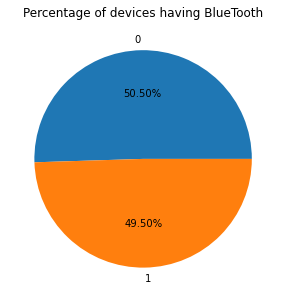

In [25]:
#Percentage of devices having BlueTooth
count=train["blue"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having BlueTooth")
plt.show()

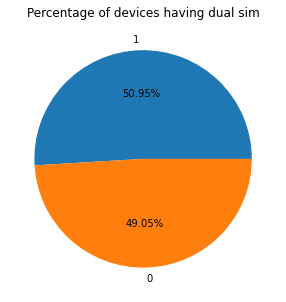

In [26]:
#Percentage of devices having dual sim
count=train["dual_sim"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having dual sim")
plt.show()

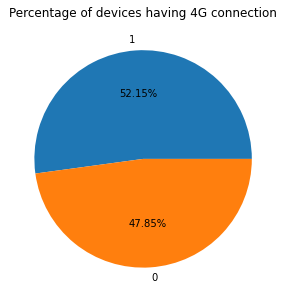

In [27]:
#Percentage of devices having 4G connection
count=train["four_g"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having 4G connection")
plt.show()

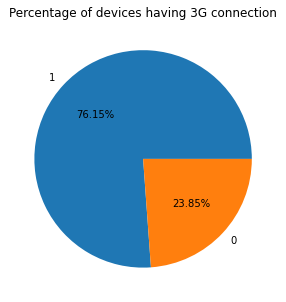

In [28]:
#Percentage of devices having 3G connection
count=train["three_g"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having 3G connection")
plt.show()

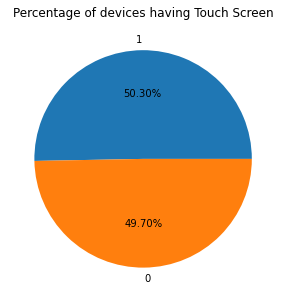

In [29]:
#Percentage of devices having Touch Screen
count=train["touch_screen"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having Touch Screen")
plt.show()

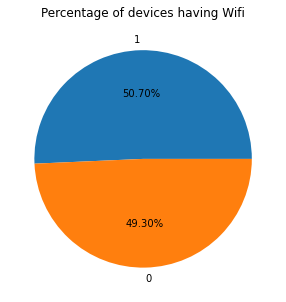

In [30]:
#Percentage of devices having Wifi
count=train["wifi"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having Wifi")
plt.show()

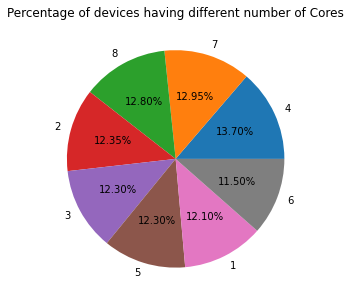

In [31]:
#Percentage of devices having different number of Cores
count=train["n_cores"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having different number of Cores")
plt.show()

# * Bivariate Analysis

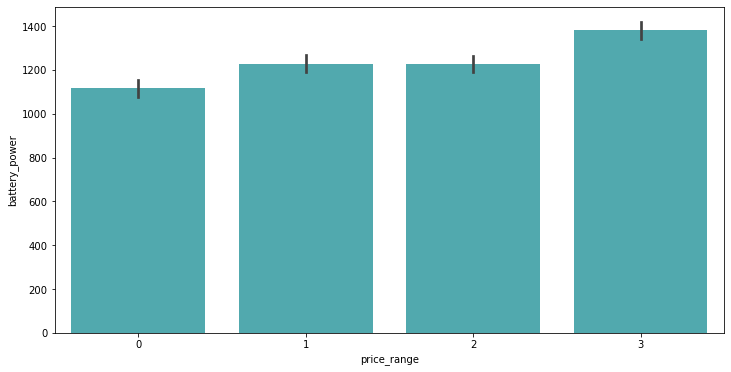

In [32]:
#Relation between price range and battery power
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'battery_power',color='#42b7bd', data=train_df)
plt.show()

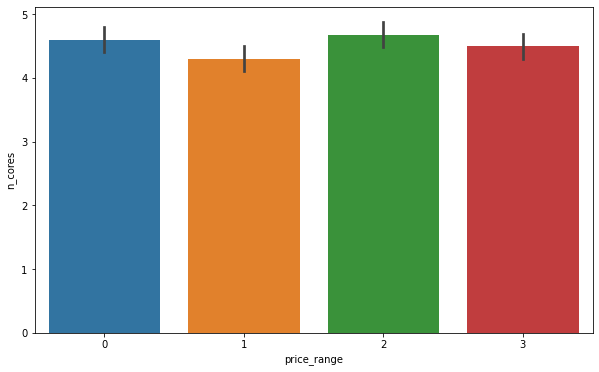

In [33]:
#Plotting Relation between Price Range & number of cores of processor
plt.figure(figsize = (10,6))
sns.barplot(x = 'price_range', y = 'n_cores', data=train_df)
plt.show()

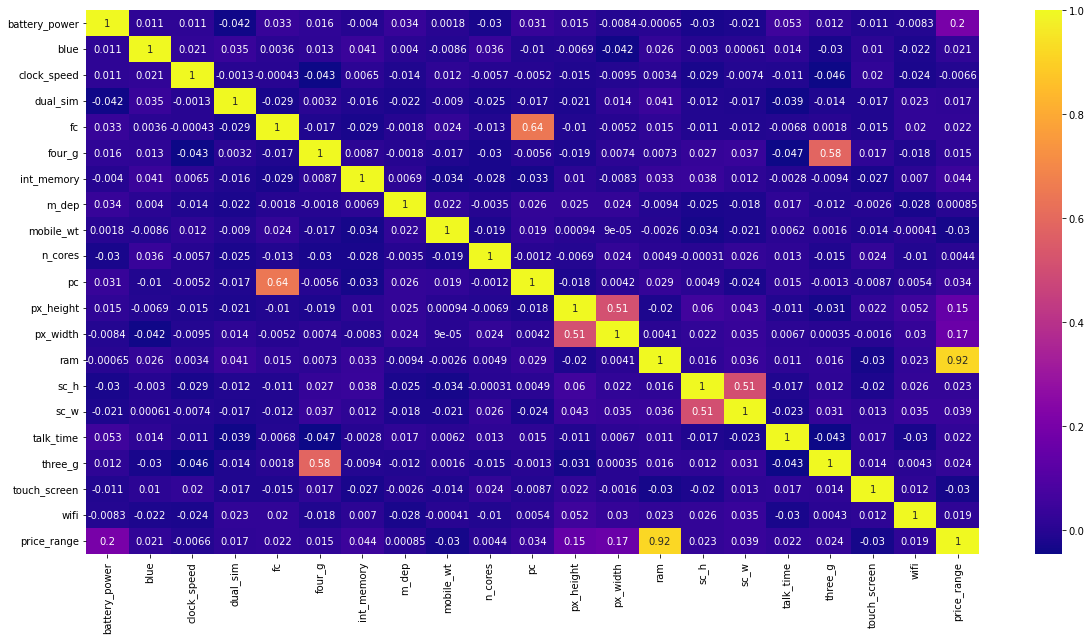

In [34]:
#correlation of data
plt.figure(figsize = (20,10))
sns.heatmap(train_df.corr(),annot=True,cmap='plasma')
plt.show()

# * Classification of dataset

In [35]:
# Splitting the data set into two : Hardware dataset and Software dataset

train_data_hw=train.loc[:,['battery_power','dual_sim','fc','int_memory','mobile_wt','n_cores','pc','ram','sc_h','sc_w','touch_screen']]
train_data_hw=pd.DataFrame(train_data_hw)
train_data_hw.head()

,battery_power,dual_sim,fc,int_memory,mobile_wt,n_cores,pc,ram,sc_h,sc_w,touch_screen
0,842,0,1,7,188,2,2,2549,9,7,0
1,1021,1,0,53,136,3,6,2631,17,3,1
2,563,1,2,41,145,5,6,2603,11,2,1
3,615,0,0,10,131,6,9,2769,16,8,0
4,1821,0,13,44,141,2,14,1411,8,2,1


In [36]:
train_data_sw=train.loc[:,['blue', 'clock_speed','four_g','m_dep','px_height','px_width','talk_time', 'three_g','wifi']]
train_data_sw.head()

,blue,clock_speed,four_g,m_dep,px_height,px_width,talk_time,three_g,wifi
0,0,2.2,0,0.6,20,756,19,0,1
1,1,0.5,1,0.7,905,1988,7,1,0
2,1,0.5,1,0.9,1263,1716,9,1,0
3,1,2.5,0,0.8,1216,1786,11,1,0
4,1,1.2,1,0.6,1208,1212,15,1,0


# * Merging of datasets

In [37]:
train_merge=pd.concat([train_data_hw,train_data_sw], axis=1)
train_merge

,battery_power,dual_sim,fc,int_memory,mobile_wt,n_cores,pc,ram,sc_h,sc_w,touch_screen,blue,clock_speed,four_g,m_dep,px_height,px_width,talk_time,three_g,wifi
0,842,0,1,7,188,2,2,2549,9,7,0,0,2.2,0,0.6,20,756,19,0,1
1,1021,1,0,53,136,3,6,2631,17,3,1,1,0.5,1,0.7,905,1988,7,1,0
2,563,1,2,41,145,5,6,2603,11,2,1,1,0.5,1,0.9,1263,1716,9,1,0
3,615,0,0,10,131,6,9,2769,16,8,0,1,2.5,0,0.8,1216,1786,11,1,0
4,1821,0,13,44,141,2,14,1411,8,2,1,1,1.2,1,0.6,1208,1212,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0,2,106,6,14,668,13,4,1,1,0.5,1,0.8,1222,1890,19,1,0
1996,1965,1,0,39,187,4,3,2032,11,10,1,1,2.6,0,0.2,915,1965,16,1,1
1997,1911,1,1,36,108,8,3,3057,9,1,1,0,0.9,1,0.7,868,1632,5,1,0
1998,1512,0,4,46,145,5,5,869,18,10,1,0,0.9,1,0.1,336,670,19,1,1


# * Ranking features

In [38]:
# Ranking dataset according to price range

train["rank_by_price"] = train["price_range"].rank()
df1 = train
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5


In [39]:
# Sorting above dataset according to ranked_price_range
df1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


In [40]:
# Ranking on all the features using rank()

df2 = train
RankedDataset1 = df2.rank()
RankedDataset1.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5


In [41]:
# Ranking all the features separately to correct output
# because not all features are good when values are high and not all features are good when values are low
# It depends on each and every feature

b = df2
b["rank_by_price"] = b["price_range"].rank()
b["rank_by_battery"] = b["battery_power"].rank(ascending=False)
b["rank_by_blueooth"] = b["blue"].rank(ascending=False)
b["rank_by_clockspeed"] = b["clock_speed"].rank(ascending=False)
b["rank_by_DualSIM"] = b["dual_sim"].rank(ascending=False)
b["rank_by_fc"] = b["fc"].rank(ascending=False)
b["rank_by_4G"] = b["four_g"].rank(ascending=False)
b["rank_by_InternalMemory"] = b["int_memory"].rank(ascending=False)
b["rank_by_mdep"] = b["m_dep"].rank(ascending=False)
b["rank_by_weight"] = b["mobile_wt"].rank(ascending=True)
b["rank_by_ncores"] = b["n_cores"].rank(ascending=False)
b["rank_by_pc"] = b["pc"].rank(ascending=False)
b["rank_by_height"] = b["px_height"].rank(ascending=False)
b["rank_by_width"] = b["px_width"].rank(ascending=False)
b["rank_by_ram"] = b["ram"].rank(ascending=False)
b["rank_by_sch"] = b["sc_h"].rank(ascending=False)
b["rank_by_scw"] = b["sc_w"].rank(ascending=False)
b["rank_by_talktime"] = b["talk_time"].rank(ascending=False)
b["rank_by_3G"] = b["three_g"].rank(ascending=False)
b["rank_by_touchscreen"] = b["touch_screen"].rank(ascending=False)
b["rank_by_wifi"] = b["wifi"].rank(ascending=False)
b.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [42]:
RankedDataset2 = b.iloc[:,21:]
RankedDataset2

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5


# * Feature Scaling

In [43]:
# Splitting train into x and y
# x denotes feature columns and y denotes target column
x=train_df.drop(['price_range'],axis=1)
y=pd.DataFrame(train_df['price_range'])

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
test=sc.fit_transform(test)

# * Model Building

In [46]:
# Model 1 : Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_predlog=log.predict(x_test)


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
am_log=accuracy_score(y_test,y_predlog)*100
print('Accuracy of Logistic Regression Classifier is: {}%'.format(am_log))

Accuracy of Logistic Regression Classifier is: 96.0%


In [48]:
print('Confusion Matrix of Logistic Regression Classifier is: {}'.format(confusion_matrix(y_test,y_predlog)))

Confusion Matrix of Logistic Regression Classifier is: [[125   7   0   0]
 [  2 116   0   0]
 [  0   6 110   4]
 [  0   0   1 129]]


In [49]:
print('{}'.format(classification_report(y_test,y_predlog)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       132
           1       0.90      0.98      0.94       118
           2       0.99      0.92      0.95       120
           3       0.97      0.99      0.98       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [50]:
# Model 2: Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)


In [51]:
am_dt=accuracy_score(y_test,y_preddt)*100
print('Accuracy of Decision Tree Classifier is: {}%'.format(am_dt))

Accuracy of Decision Tree Classifier is: 80.60000000000001%


In [52]:
print('Confusion Matrix of Decision Tree Classifier is: {}'.format(confusion_matrix(y_test,y_preddt)))

Confusion Matrix of Decision Tree Classifier is: [[111  21   0   0]
 [ 14  87  17   0]
 [  0  18  85  17]
 [  0   0  10 120]]


In [53]:
print('{}'.format(classification_report(y_test,y_preddt)))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       132
           1       0.69      0.74      0.71       118
           2       0.76      0.71      0.73       120
           3       0.88      0.92      0.90       130

    accuracy                           0.81       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.81      0.81      0.81       500



In [54]:
# Model 3: Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_predgnb=gnb.predict(x_test)

In [55]:
am_gnb=accuracy_score(y_test,y_predgnb)*100
print('Accuracy of Guassian Naive Bayes Classifier is: {}%'.format(am_gnb))

Accuracy of Guassian Naive Bayes Classifier is: 79.60000000000001%


In [56]:
print('Confusion Matrix of Guassian Naive Bayes Classifier is: {}'.format(confusion_matrix(y_test,y_predgnb)))

Confusion Matrix of Guassian Naive Bayes Classifier is: [[117  15   0   0]
 [ 12  85  21   0]
 [  0  17  87  16]
 [  0   0  21 109]]


In [57]:
print('{}'.format(classification_report(y_test,y_predgnb)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       132
           1       0.73      0.72      0.72       118
           2       0.67      0.72      0.70       120
           3       0.87      0.84      0.85       130

    accuracy                           0.80       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.80      0.80      0.80       500



In [58]:
# Model 4: Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_predbnb=bnb.predict(x_test)


In [59]:
am_bnb=accuracy_score(y_test,y_predbnb)*100
print('Accuracy of Bernoulli Naive Bayes Classifier is: {}%'.format(am_bnb))

Accuracy of Bernoulli Naive Bayes Classifier is: 57.99999999999999%


In [60]:
print('Confusion Matrix of Bernoulli Naive Bayes Classifier is: {}'.format(confusion_matrix(y_test,y_predbnb)))

Confusion Matrix of Bernoulli Naive Bayes Classifier is: [[89 43  0  0]
 [52 44 16  6]
 [ 2 14 67 37]
 [ 0  0 40 90]]


In [61]:
print('{}'.format(classification_report(y_test,y_predbnb)))

              precision    recall  f1-score   support

           0       0.62      0.67      0.65       132
           1       0.44      0.37      0.40       118
           2       0.54      0.56      0.55       120
           3       0.68      0.69      0.68       130

    accuracy                           0.58       500
   macro avg       0.57      0.57      0.57       500
weighted avg       0.57      0.58      0.58       500



In [62]:
# Model 5: kNN

from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn.fit(x_train,y_train)
    y_predknn=knn.predict(x_test)
    acc=accuracy_score(y_test,y_predknn)
    acc_values.append(acc)
acc_values


[0.476, 0.486, 0.52, 0.5, 0.53, 0.526, 0.556, 0.546, 0.54, 0.552, 0.55, 0.548]

In [63]:
am_knn=accuracy_score(y_test,y_predknn)*100
print('Accuracy of kNN Classifier is: {}%'.format(am_knn))

Accuracy of kNN Classifier is: 54.800000000000004%


In [64]:
print('Confusion Matrix of kNN Classifier is: {}'.format(confusion_matrix(y_test,y_predknn)))

Confusion Matrix of kNN Classifier is: [[94 32  6  0]
 [30 59 24  5]
 [10 46 47 17]
 [ 1  7 48 74]]


In [65]:
print('{}'.format(classification_report(y_test,y_predknn)))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       132
           1       0.41      0.50      0.45       118
           2       0.38      0.39      0.38       120
           3       0.77      0.57      0.65       130

    accuracy                           0.55       500
   macro avg       0.56      0.54      0.55       500
weighted avg       0.57      0.55      0.55       500



Text(0, 0.5, 'Accuracy')

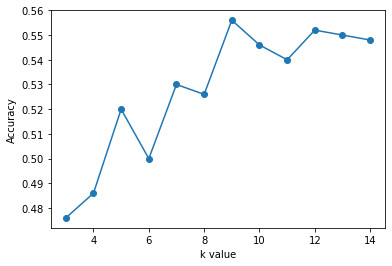

In [66]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [67]:
knn=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

In [68]:
am_knn=accuracy_score(y_test,y_predknn)*100
print('Accuracy of kNN Classifier is: {}%'.format(am_knn))

Accuracy of kNN Classifier is: 55.60000000000001%


In [69]:
print('Confusion Matrix of kNN Classifier is: {}'.format(confusion_matrix(y_test,y_predknn)))

Confusion Matrix of kNN Classifier is: [[100  29   3   0]
 [ 36  50  24   8]
 [  9  41  51  19]
 [  0  12  41  77]]


In [70]:
print('{}'.format(classification_report(y_test,y_predknn)))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       132
           1       0.38      0.42      0.40       118
           2       0.43      0.42      0.43       120
           3       0.74      0.59      0.66       130

    accuracy                           0.56       500
   macro avg       0.56      0.55      0.55       500
weighted avg       0.57      0.56      0.56       500



In [71]:
# Model 6 : Linear SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_predlisvm=svm_linear.predict(x_test)


In [72]:
am_lisvm=accuracy_score(y_test,y_predlisvm)*100
print('Accuracy of kNN Classifier is: {}%'.format(am_lisvm))

Accuracy of kNN Classifier is: 95.19999999999999%


In [73]:
print('Confusion Matrix of kNN Classifier is: {}'.format(confusion_matrix(y_test,y_predlisvm)))

Confusion Matrix of kNN Classifier is: [[125   7   0   0]
 [  3 115   0   0]
 [  0   9 107   4]
 [  0   0   1 129]]


In [74]:
print('{}'.format(classification_report(y_test,y_predlisvm)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       132
           1       0.88      0.97      0.92       118
           2       0.99      0.89      0.94       120
           3       0.97      0.99      0.98       130

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [75]:
# Model 7 : Radial SVM
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_predradsvm=svm_radial.predict(x_test)


In [77]:
am_radsvm=accuracy_score(y_test,y_predradsvm)*100
print('Accuracy of Radial SVM Classifier is: {}%'.format(am_radsvm))

Accuracy of Radial SVM Classifier is: 86.4%


In [78]:
print('Confusion Matrix of Radial SVM Classifier is: {}'.format(confusion_matrix(y_test,y_predradsvm)))

Confusion Matrix of Radial SVM Classifier is: [[118  14   0   0]
 [  9 100   9   0]
 [  0  17  97   6]
 [  0   0  13 117]]


In [79]:
print('{}'.format(classification_report(y_test,y_predradsvm)))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       132
           1       0.76      0.85      0.80       118
           2       0.82      0.81      0.81       120
           3       0.95      0.90      0.92       130

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.87      0.86      0.87       500



In [80]:
# Model 8 : Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)


In [81]:
am_rf=accuracy_score(y_test,y_predrf)*100
print('Accuracy of Random Forest Classifier is: {}%'.format(am_rf))

Accuracy of Random Forest Classifier is: 87.8%


In [82]:
print('Confusion Matrix of Random Forest Classifier is: {}'.format(confusion_matrix(y_test,y_predrf)))

Confusion Matrix of Random Forest Classifier is: [[124   8   0   0]
 [  8 102   8   0]
 [  0  13  95  12]
 [  0   0  12 118]]


In [83]:
print('{}'.format(classification_report(y_test,y_predrf)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       132
           1       0.83      0.86      0.85       118
           2       0.83      0.79      0.81       120
           3       0.91      0.91      0.91       130

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [84]:
test.shape

(1000, 20)

Of all the models built, it is found that Logistic Regression model with accuracy 96 % is the best suit for predicting.

In [85]:
preds=log.predict(test)
print("Predicted value using logistic regression: ",preds)

Predicted value using logistic regression:  [2 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 0 3 1 1 3 3 3 0 1 0 1 2 3 1 2 1 2 2 3
 3 0 2 0 1 3 0 3 3 0 3 0 3 1 3 0 1 1 2 1 2 1 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 2 2 0 2 1 1 3 1 1 0 3 2 1 2 1 3 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 3 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 2 2 3 3 2 2 1 0 0 1 2 1 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 1 2 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 0 3 0 0 3 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 1 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 1 0 2 2 3 2 3 0 3 0 3 0 1 1 0 2 0 3 2 3 3 1 3 1 3 1 2 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 2 0 2 3 3 0 3 0 2 3 2 3 0 2

In [86]:
submission=pd.DataFrame()
submission['id']=test_id
submission['price_range']=preds
submission

,id,price_range
0,1,2
1,2,3
2,3,2
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,0
998,999,2


In [88]:
submission.to_csv('C:\\Users\\noora\\intership_output.csv',index=False)